# Data Preprocessing 
### It's not just feature engineering

>Data Preprocessing is a technique that is used to convert the raw data into a clean data set.

Why do we need Data Preprocessing?

As humans we are lazy! Mundane tasks are a torture, when that happens even if you getting a super optimized UX Layout it just fails.

Real world data are generally: 
* Incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data
* Noisy: containing errors or outliers
* Inconsistent: containing discrepancies in codes or names

![](https://imgs.xkcd.com/comics/standards.png)

## Overview of Machine Learning workflow (ideal)

![](https://www.forge.ai/hs-fs/hubfs/Screen%20Shot%202018-05-22%20at%204.49.45%20PM.png?t=1533322978030&width=600&name=Screen%20Shot%202018-05-22%20at%204.49.45%20PM.png)

Source: Tensorflow Extend (TFX) slideshow

To simplify the workflow in a non-technical way, we can consider the following steps that we'd perform:

1. Source: Basically, all your data!
2. Tasks: Problem statement that you define.
3. Understand the data and preparing a sane version of the data to be used for analysis.
4. Data preprocessing and feature engineering.
5. Baseline model.
6. Iterations and comparing metrics.
7. Finalizing the model.

## Data Preprocessing is Feature Engineering or Exploratory Data Analysis or All of them?

Answer to this is maybe, there's a lot of overlap with all the terms mentioned. Any Venn diagram won't solve the problem. Machine Learning is an iterative process and fun part is you'd continue doing all this until you or the decision makers are satisfied.

Take this with a pinch of salt

![](https://pbs.twimg.com/profile_images/835940654509342724/chujJdF__400x400.jpg)

## Scope of this session:

1. Data type: Tabular Data
2. Data Processing for Numeric (Continuous) variables
3. Data Processing for Categorical variables
4. Data Processing for Character variables
5. Data Processing for Time related data

__If time permits, then we can have a small introduction to Regular Expressions and Text Preprocessing pipeline.__

### __Data type: Tabular Data__

Machine Learning was possible coz we could play normalized and de-normalized tables pretty fast. The entire premise of working with tables is scoped around manipulating a `dataframe`. In R, there's the standard `dataframe` format (and also the newly introduced `tibble` format). 

__Pandas__, the data manipulation library helps folks using Python to manipulate their tables.

> Wes McKinney, pandas creator was frustrated with the tools available to complete these basic data tasks at the time—he was not a fan of Excel or R (another popular programming tool).

Back in the day, Python was missing some key features that would make it a good language for data analysis. 

* It was challenging to import CSV files (one of the most common formats for storing datasets). 
* It also didn’t have an intuitive way of dealing with spreadsheet-like datasets with rows and columns, or a simple way to create a new column based on existing columns.

Pandas is super cool, and probably the only data analysis library that almost everyone uses. That's Python Zen in action.

#### Before we start off with coding, please follow the instructions below:

(__NOTE:__ Anaconda environment file has already been dumped in the github repository, so folks who want to use it follow the section after this. To troubleshoot any issues related to conda environments, refer [this page](https://conda.io/docs/using/envs.html))

* Install Miniconda in your systems (__NOTE:__ If Anaconda or Miniconda is already installed please don't install it again):
    * For MacOs and Linux folks: Fire up your terminal and run command --> `curl -L mini.conda.ml | bash`
    * For Windows folks: Please download the `.exe` from [this location](https://conda.io/miniconda.html)
    
* Next step, creating a virtual environment for this session:
    * Run command: `conda` to make sure conda is installed
    * Run command: `conda create -n greyatom python=3.6`
    * Say 'yes' to the installation question.
    
* Once successfully installed, run: `source activate greyatom`
* The next step will be to install the packages using: `pip install pandas matplotlib seaborn scikit-learn jupyter`

#### For folks, using the `greyatom.yml` Anaconda configuration file:

* In the cloned git repository, you'll have `greyatom.yml` file.
* Run command: `conda env create -f greyatom.yml`
* Once successfully installed, run: `source activate greyatom`

#### Downloading the data:

* We'll be using the Lending Club 2015 dataset for our primary data preprocessing walk-through.
* The datasets for 2007-2011 (dataframe named `lc1` below) and 2012-2013 (dataframe named `lc2` below) have also been used for purposes to demonstrate a few pandas related functions.
* To get the dataset, visit [this website](https://www.lendingclub.com/info/download-data.action)

#### Importing the required libraries

In [1]:
%matplotlib inline
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('float_format', '{:2f}'.format)
warnings.filterwarnings("ignore", message="binary incompatibility")

/Users/pratos/miniconda3/envs/greyatom/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Issue with the warnings: [StackOverFlow Issue](https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility) 

#### Setting up the data path

In [2]:
DATA_PATH = "../data/"

#### Importing data files for our dataset

In [3]:
DATA_PATH+'LoanStats3a.csv'

'../data/LoanStats3a.csv'

__NOTE:__ For folks using Windows if the relative paths are not working, please copy paste the entire path in the `read_csv` function's `filepath` attribute.

#### 2007-2011 Lending Club Loan Data

In [4]:
lc1 = pd.read_csv(DATA_PATH+'LoanStats3a.csv', delimiter=',', low_memory=False)

#### 2012-2013 Lending Club Loan Data

In [5]:
lc2 = pd.read_csv(os.path.join(DATA_PATH, 'LoanStats3b.csv'), delimiter=',', low_memory=False)

#### 2015 Lending Club Loan Data

In [6]:
lc3 = pd.read_csv(os.path.join(DATA_PATH, 'LoanStats3d.csv'), delimiter=',', low_memory=False)

Let's check whether our imports are exactly how we wanted.

In [7]:
lc1.head()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title           emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc                                               purpose        title                zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt        total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount disbursement_method debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       5000      5000        4975             36 months  10.65%  162.87      B     B2        NaN                 10+ years  RENT           24000      Verified            Dec-2011 Fully Paid  n          NaN   Borrower added on 12/22/11 > I need to upgrad... credit_card    Computer             860xx    AZ         27.65 0           Jan-1985         1              NaN                    NaN                    3        0       13648     83.7%      9         f                   0.00      0.00          5863.1551866952    5833.84         5000.00         863.16        0.0                0.0        0.0                     Jan-2015     171.62          NaN          Jun-2018           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              NaN          NaN         NaN         NaN         NaN         NaN         NaN                NaN          NaN     NaN         NaN         NaN        NaN      NaN              NaN    NaN         NaN          NaN                  NaN         NaN            NaN     0                        0           NaN                NaN                  NaN                   NaN            NaN      NaN                  NaN                      NaN                   NaN                            NaN                   NaN            NaN             NaN         NaN       NaN       NaN           NaN           NaN                

In [8]:
lc1.shape

(42539, 1)

#### What happened here?

The `.csv` file that we need to import is not in the format that we require. If you see the shape (`(rows, columns)`) of the dataframe has just a single column.

#### What might be the reason?

Presence of a weird, extra row that isn't comma formatted. You can check this out by opening up any `.csv` file in __Excel__ or just a simple `cat <filename>.csv | head -1` on the terminal (applicable only for MacOS or Linux users)

(__NOTE:__ Windows users do not run the cell below)

In [9]:
!cat ../data/LoanStats3a.csv | head -1

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
cat: stdout: Broken pipe


#### How to solve?

As you can see above issue is due to a rogue first row. We'll try to remove that row.

To do that `read_csv` provides a great attribute `skiprows` that skips the first line.

>Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file.

In [10]:
lc1 = pd.read_csv(DATA_PATH+'LoanStats3a.csv', skiprows=[0], delimiter=',', low_memory=False)

In [11]:
lc1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,5000.000000,5000.000000,4975.000000,36 months,10.65%,162.870000,B,B2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,2500.000000,2500.000000,2500.000000,60 months,15.27%,59.830000,C,C4,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,2400.000000,2400.000000,2400.000000,36 months,15.96%,84.330000,C,C5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,10000.000000,10000.000000,10000.000000,36 months,13.49%,339.310000,C,C1,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,3000.000000,3000.000000,3000.000000,60 months,12.69%,67.790000,B,B5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan


We can continue this for the rest of the two files as well.

In [12]:
lc2 = pd.read_csv(os.path.join(DATA_PATH, 'LoanStats3b.csv'), skiprows=[0], delimiter=',', low_memory=False)
lc_df_2015 = pd.read_csv(os.path.join(DATA_PATH, 'LoanStats3d.csv'), skiprows=[0], delimiter=',', low_memory=False)

In [13]:
lc2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,27050.000000,27050.000000,27050.000000,36 months,10.99%,885.460000,B,B2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,4800.000000,4800.000000,4800.000000,36 months,10.99%,157.130000,B,B2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,12000.000000,12000.000000,12000.000000,36 months,7.62%,373.940000,A,A3,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,12000.000000,12000.000000,12000.000000,36 months,11.99%,398.520000,B,B3,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,12000.000000,12000.000000,12000.000000,36 months,6.62%,368.450000,A,A2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan


In [14]:
lc_df_2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,16000.000000,16000.000000,16000.000000,60 months,12.88%,363.070000,C,C2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,18500.000000,18500.000000,18500.000000,60 months,12.88%,419.800000,C,C2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,16000.000000,16000.000000,16000.000000,60 months,17.97%,406.040000,D,D4,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,15000.000000,15000.000000,15000.000000,36 months,9.80%,482.610000,B,B3,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,6000.000000,6000.000000,6000.000000,36 months,7.91%,187.770000,A,A5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan


Let's view the data in a transposed format.

In [15]:
lc_df_2015.shape

(421097, 145)

In [16]:
lc_df_2015.T

,0,1,2,3,4,5,6,7,8,9,...,421087,421088,421089,421090,421091,421092,421093,421094,421095,421096
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total amount funded in policy code 1: 6417608175,Total amount funded in policy code 2: 1944088810
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,16000.000000,18500.000000,16000.000000,15000.000000,6000.000000,29900.000000,8800.000000,2500.000000,3600.000000,14650.000000,...,7500.000000,11575.000000,12000.000000,10000.000000,24000.000000,12000.000000,13000.000000,20000.000000,NaN,NaN
funded_amnt,16000.000000,18500.000000,16000.000000,15000.000000,6000.000000,29900.000000,8800.000000,2500.000000,3600.000000,14650.000000,...,7500.000000,11575.000000,12000.000000,10000.000000,24000.000000,12000.000000,13000.000000,20000.000000,NaN,NaN
funded_amnt_inv,16000.000000,18500.000000,16000.000000,15000.000000,6000.000000,29900.000000,8800.000000,2500.000000,3600.000000,14650.000000,...,7500.000000,11575.000000,12000.000000,10000.000000,24000.000000,12000.000000,13000.000000,20000.000000,NaN,NaN
term,60 months,60 months,60 months,36 months,36 months,60 months,36 months,36 months,36 months,60 months,...,36 months,36 months,36 months,36 months,36 months,60 months,60 months,36 months,NaN,NaN
int_rate,12.88%,12.88%,17.97%,9.80%,7.91%,12.88%,9.80%,17.27%,13.99%,20.50%,...,9.49%,15.59%,11.99%,11.99%,11.99%,19.99%,15.99%,11.99%,NaN,NaN
installment,363.070000,419.800000,406.040000,482.610000,187.770000,678.490000,283.130000,89.470000,123.030000,392.230000,...,240.220000,404.610000,398.520000,332.100000,797.030000,317.860000,316.070000,664.200000,NaN,NaN
grade,C,C,D,B,A,C,B,D,C,E,...,B,D,B,B,B,E,D,B,NaN,NaN
sub_grade,C2,C2,D4,B3,A5,C2,B3,D3,C4,E4,...,B2,D1,B5,B5,B5,E3,D2,B5,NaN,NaN


We won't be using all the variables in this dataset, rather a subset of it. Which are these let's figure out. 


#### What if there are more than two datasets that need to be concatenated row-wise?

We have two dataframes (lc1 & lc2) to work on, and we'd concatenate these two using (surprise, surprise) `pd.concat`.

> The concat function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis.

In [17]:
lc1.shape

(42538, 145)

In [18]:
lc2.shape

(188183, 145)

In [19]:
pd.concat([lc1, lc2]).shape

(230721, 145)

> Method chaining, where you call methods on an object one after another.

To know more about this, read [Tom Augsperger's blog](https://tomaugspurger.github.io/method-chaining).

Let's save a copy.

In [20]:
lending_club_concat = pd.concat([lc1, lc2])

### Selecting the variables to be used

In [21]:
columns_selected = ['loan_amnt', 'term', 'int_rate', 'installment', \
                    'grade', 'sub_grade', 'emp_title', \
                   'emp_length', 'home_ownership', 'annual_inc', \
                    'verification_status', 'issue_d', 'loan_status', \
                   'purpose', 'addr_state', 'dti', 'earliest_cr_line', \
                    'inq_last_6mths']

This point onwards, we'll be using `lc_df_2015` dataframe.

In [22]:
lc_df_2015 = lc_df_2015[columns_selected]

In [23]:
lc_df_2015.shape

(421097, 18)

### A bit of EDA (to cut down our data even more)

* Target Variable here is definitely the `loan_status`.

In [24]:
lc_df_2015['loan_status'].nunique()

7

In [25]:
set(lc_df_2015['loan_status'])

{'Charged Off',
 'Current',
 'Default',
 'Fully Paid',
 'In Grace Period',
 'Late (16-30 days)',
 'Late (31-120 days)',
 nan}

* Since, for our final model we need loans that are completed we'd be picking up `Default`, `Charged Off` and `Fully Paid` to make things a bit simpler.

> DataFrame.query: Query the columns of a frame with a boolean expression.

This operation is called subsetting a dataframe.

For these kind of operations, pandas provides a varied number of ways to do the same thing. As a start, `query` provides a good interface to work with dataframe.

In [26]:
lc_df_2015.query('loan_status == "Default" or loan_status == "Fully Paid" or \
                        loan_status == "Charged Off"').shape

(302192, 18)

In [27]:
lc_df_2015 = lc_df_2015.query('loan_status == "Default" or loan_status == "Fully Paid" or \
                                            loan_status == "Charged Off"')

> Dataframe.groupby: Group series using mapper (dict or key function, apply given function to group, return result as series) or by a series of columns.

In [28]:
lc_df_2015.groupby('loan_status')['loan_amnt'].count()

loan_status
Charged Off     68293
Default           241
Fully Paid     233658
Name: loan_amnt, dtype: int64

In [29]:
lc_df_2015.groupby(['loan_status', 'grade'])['loan_amnt'].count()

loan_status  grade
Charged Off  A         3612
             B        12426
             C        21014
             D        15623
             E        10792
             F         3865
             G          961
Default      A           12
             B           60
             C           78
             D           42
             E           34
             F           13
             G            2
Fully Paid   A        52171
             B        70182
             C        63740
             D        29384
             E        13908
             F         3488
             G          785
Name: loan_amnt, dtype: int64

For the sake of simplicity, let's focus on C grade for now.

In [30]:
lc_df_2015.query('grade == "C"').shape

(84832, 18)

In [31]:
lc_df_2015 = lc_df_2015.query('grade == "C"')

__TIP:__ Whenever a dataframe subsetting or dropping rows operation has been done, always reset the indices to avoid problems when using `.loc`. To do that run the following commands.

Indices before resetting:

In [32]:
lc_df_2015.index.tolist()[:5]

[1, 5, 10, 24, 30]

After resetting:

In [33]:
lc_df_2015 = lc_df_2015.reset_index(drop=True)

In [34]:
lc_df_2015.index.tolist()[:5]

[0, 1, 2, 3, 4]

### Data Preprocessing for Numerical (continuous) variables

The first thing to do when faced with a dataframe is to generate the summary statistics. Pandas provides an easy way to do it using `describe()`.

> dataframe.descibe: Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [35]:
lc_df_2015.describe()

,loan_amnt,installment,annual_inc,dti,inq_last_6mths
count,84832.000000,84832.000000,84832.000000,84831.000000,84832.000000
mean,13933.708683,415.708727,71228.421499,19.511762,0.668474
std,8560.130342,249.484938,66959.084445,8.657987,0.920955
min,1000.000000,33.210000,0.000000,0.000000,0.000000
25%,7200.000000,236.980000,43000.000000,13.020000,0.000000
50%,12000.000000,344.950000,60000.000000,19.070000,0.000000
75%,20000.000000,540.500000,85000.000000,25.740000,1.000000
max,35000.000000,1213.120000,8706582.000000,104.000000,6.000000


#### Can you point down some observations based on the summary statistics?

#### Histograms for numerical variables

In [36]:
lc_df_2015.shape

(84832, 18)

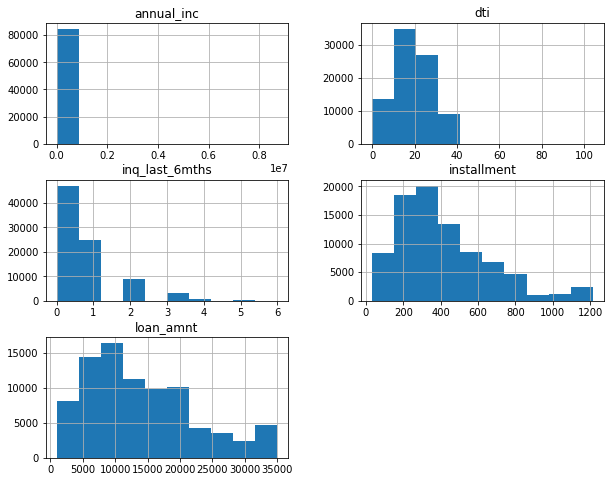

In [37]:
lc_df_2015.hist(figsize=(10,8))
plt.show()

#### Outlier detection

* One of the better methods to detect outliers is to view the box-plot.

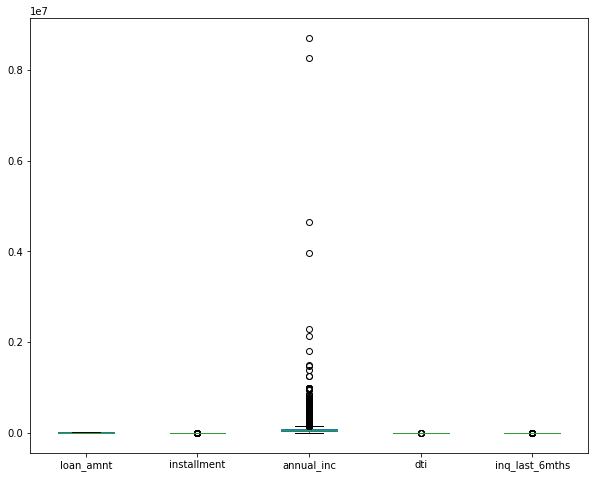

In [38]:
lc_df_2015.plot(kind='box', figsize=(10,8))

Ideal method to identify outliers is to do via calculating __z-score__

> z-score is the number of standard deviations from the mean a data point is.

![](http://static.wixstatic.com/media/f20e2f_4c138256c99945b29c74f69f81dc18b4~mv2.jpg)

In [39]:
from scipy.stats import zscore

standardized = lc_df_2015.groupby('grade').transform(zscore)

In [40]:
standardized.head()

,loan_amnt,installment,annual_inc,dti,inq_last_6mths
0,0.533440,0.016399,-0.018346,nan,0.359982
1,1.865204,1.053301,-0.093019,nan,-0.725853
2,1.257733,1.621636,-0.093019,nan,3.617488
3,1.584832,0.947362,1.848477,nan,-0.725853
4,0.241387,-0.192553,-0.436514,nan,-0.725853


In [41]:
outliers = (standardized['annual_inc'] > 3)

In [42]:
set(lc_df_2015['verification_status'])

{'Not Verified', 'Source Verified', 'Verified'}

In [43]:
lc_df_2015.loc[outliers].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths
373,28000.000000,36 months,12.88%,941.820000,C,C2,sales,8 years,MORTGAGE,450000.000000,Source Verified,Dec-2015,Fully Paid,credit_card,KS,14.940000,Oct-1994,3.000000
743,16000.000000,36 months,11.99%,531.360000,C,C1,Vice President,2 years,MORTGAGE,600000.000000,Source Verified,Dec-2015,Fully Paid,credit_card,TX,11.020000,Nov-1996,0.000000
780,10000.000000,36 months,13.99%,341.730000,C,C4,Director Of Engineering,10+ years,MORTGAGE,300000.000000,Source Verified,Dec-2015,Fully Paid,home_improvement,NH,3.330000,Dec-2002,0.000000
791,30000.000000,36 months,13.44%,1017.190000,C,C3,physician,6 years,MORTGAGE,350000.000000,Source Verified,Dec-2015,Fully Paid,credit_card,NY,14.130000,Jan-1991,3.000000
998,28000.000000,36 months,12.88%,941.820000,C,C2,Associate Broker,5 years,RENT,369000.000000,Source Verified,Dec-2015,Fully Paid,other,NM,6.310000,Sep-1999,2.000000


Outliers can either be treated or the entire data point (row) be removed. Taking a call on this will require domain expertise and working with business folks to making these decisions. 

In a real world setting outlier treatment, two favourable methods that can be used are:

1. Binning or Quantization
2. Treating them separately (as separate group of model if the outlier size is significant)

### Quantization or Binning

Types:

1. Rule based 
2. Quantile based 

Taking the example of the extreme outliers that we see in `annual_inc`, this is one variable whose values can be binned to reduce the outlier effects.

* __Rule based__

In [44]:
lc_df_2015['annual_inc'].describe()

count     84832.000000
mean      71228.421499
std       66959.084445
min           0.000000
25%       43000.000000
50%       60000.000000
75%       85000.000000
max     8706582.000000
Name: annual_inc, dtype: float64

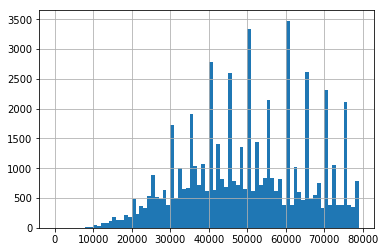

In [45]:
lc_df_2015['annual_inc'].hist(bins=range(0, 80000, 1000))
plt.show()

We could set out rules as follows:

* 0-30k: Lower income group
* 31k-150k: Middle income group
* 151k-300k: Upper middle income group
* 300k+: Higher income group

One of the problems while setting up manual fixed-width bins is that we aren't really sure whether that's the right binning. It takes a bit of tweaking before it is right.

#### How to code it up?

Use `pd.cut` to calculate bins.

> Return indices of half-open bins to which each value of x belongs. The cut function can be useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.

In [46]:
lc_df_2015['annual_inc_bins'] = pd.cut(lc_df_2015['annual_inc'], \
       bins=[0, 30000, 150000, 300000, max(lc_df_2015['annual_inc'])], \
       labels=['lower_inc_grp', 'middle_inc_grp', 'upper_mid_inc_grp', 'higher_inc_grp'])

Let's compare whether our binning strategy is correct or not

In [47]:
lc_df_2015[['annual_inc', 'annual_inc_bins']].head()

,annual_inc,annual_inc_bins
0,70000.000000,middle_inc_grp
1,65000.000000,middle_inc_grp
2,65000.000000,middle_inc_grp
3,195000.000000,upper_mid_inc_grp
4,42000.000000,middle_inc_grp


In [48]:
set(lc_df_2015.query('annual_inc <= 30000')['annual_inc_bins'])

{'lower_inc_grp', nan}

In [49]:
set(lc_df_2015.query('annual_inc > 30000 & annual_inc <= 150000')['annual_inc_bins'])

{'middle_inc_grp'}

In [50]:
set(lc_df_2015.query('annual_inc > 150000 & annual_inc <= 300000')['annual_inc_bins'])

{'upper_mid_inc_grp'}

In [51]:
set(lc_df_2015.query('annual_inc > 300000')['annual_inc_bins'])

{'higher_inc_grp'}

Our binning strategy is executed in a sane way by `pd.cut()`. But as mentioned earlier, moving to __quantile based__ binning would make sense here (mostly everywhere). 

__NOTE:__ In the lower income group, there are `nan`'s which needs to be addressed. More of that in the __Missing Values__ section

* __Quantile based__

To calculate quantile values of a feature, pandas provides `quantile()` that is a pretty handy function.

>Return values at the given quantile over requested axis, a la numpy.percentile.

In [52]:
lc_df_2015['annual_inc'].quantile([0.05, 0.25, 0.75, 0.95]).tolist()

[26000.0, 43000.0, 85000.0, 148600.0]

In [53]:
quantile_bins = lc_df_2015['annual_inc'].quantile([0.05, 0.25, 0.75, 0.95]).tolist()

The list `quantile_bins` would be supplied to the `pd.cut()` function that we used above.

Adding `0` at the first position.

In [54]:
quantile_bins.insert(0, 0)

In [55]:
len(quantile_bins)

5

In [56]:
quantile_bins.insert(5, max(lc_df_2015['annual_inc']))

In [57]:
lc_df_2015['annual_inc_bins_quantiles'] = pd.cut(lc_df_2015['annual_inc'], \
       bins=quantile_bins, \
       labels=['lower_inc_grp', 'lower_middle_inc_grp', 'middle_inc_grp', 'upper_mid_inc_grp', 'higher_inc_grp'])

In [58]:
lc_df_2015[['annual_inc', 'annual_inc_bins_quantiles']].head()

,annual_inc,annual_inc_bins_quantiles
0,70000.000000,middle_inc_grp
1,65000.000000,middle_inc_grp
2,65000.000000,middle_inc_grp
3,195000.000000,higher_inc_grp
4,42000.000000,lower_middle_inc_grp


In [59]:
set(lc_df_2015.query('annual_inc <= '+str(quantile_bins[1]))['annual_inc_bins_quantiles'])

{'lower_inc_grp', nan}

In [60]:
set(lc_df_2015.query('annual_inc > '+ str(quantile_bins[1]) +' & annual_inc <= '+ str(quantile_bins[2]))['annual_inc_bins_quantiles'])

{'lower_middle_inc_grp'}

In [61]:
set(lc_df_2015.query('annual_inc > ' + str(quantile_bins[2]) + ' & annual_inc <= ' + str(quantile_bins[3]))['annual_inc_bins_quantiles'])

{'middle_inc_grp'}

In [62]:
set(lc_df_2015.query('annual_inc > ' + str(quantile_bins[3]) + ' & annual_inc <= ' + str(quantile_bins[4]))['annual_inc_bins_quantiles'])

{'upper_mid_inc_grp'}

In [63]:
set(lc_df_2015.query('annual_inc > ' + str(quantile_bins[4]))['annual_inc_bins_quantiles'])

{'higher_inc_grp'}

#### Task :Try out one variable that can be binned down here

#### Correlation plot

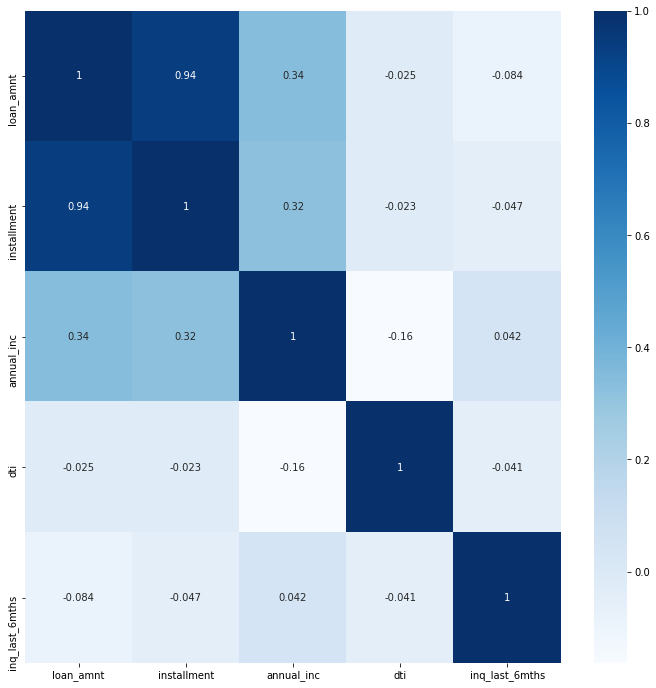

In [64]:
import seaborn as sns
corr = lc_df_2015.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

#### What can we infer from this?

#### Missing Value Imputation

> NaN and None both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate.

In [65]:
pd.Series([1, np.nan, 2, None])

0   1.000000
1        nan
2   2.000000
3        nan
dtype: float64

#### Operating on Null Values

As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

* `isnull()`: Generate a boolean mask indicating missing values
* `notnull()`: Opposite of isnull()
* `dropna()`: Return a filtered version of the data
* `fillna()`: Return a copy of the data with missing values filled or imputed

As we observed while creating the annual income bins, we faced `nan` values. That's somewhere we can start off.

Finding the count of `nan` and empty strings (yes, empty string `""` or `" "` is not handled separately, occurs mostly in character and categorical variable list) 

In [66]:
lc_df_2015.isnull().sum()

loan_amnt                       0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    4899
emp_length                   4895
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
addr_state                      0
dti                             1
earliest_cr_line                0
inq_last_6mths                  0
annual_inc_bins                 1
annual_inc_bins_quantiles       1
dtype: int64

In [67]:
lc_df_2015.isna().sum()

loan_amnt                       0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    4899
emp_length                   4895
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
addr_state                      0
dti                             1
earliest_cr_line                0
inq_last_6mths                  0
annual_inc_bins                 1
annual_inc_bins_quantiles       1
dtype: int64

Seems that the issue is with the newly created variables, `annual_inc_bins` and `annual_inc_bins_quantiles`

#### Can you try to find it out?

* __Dropping `nan`'s__

Moving to our missing values, `emp_title` and `emp_length` seem to have missing values. Let's find out more

In [68]:
lc_df_2015['emp_length'].head()

0    10+ years
1    10+ years
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [69]:
lc_df_2015[pd.isnull(lc_df_2015['emp_length'])].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,annual_inc_bins,annual_inc_bins_quantiles
74,25000.000000,60 months,13.44%,574.480000,C,C3,NaN,NaN,OWN,50000.000000,Not Verified,Dec-2015,Fully Paid,home_improvement,AL,6.390000,Jul-1995,0.000000,middle_inc_grp,middle_inc_grp
86,8000.000000,36 months,13.99%,273.390000,C,C4,NaN,NaN,MORTGAGE,50000.000000,Not Verified,Dec-2015,Fully Paid,debt_consolidation,MD,19.850000,May-1986,0.000000,middle_inc_grp,middle_inc_grp
100,20000.000000,36 months,12.88%,672.730000,C,C2,NaN,NaN,OWN,65000.000000,Not Verified,Dec-2015,Charged Off,debt_consolidation,WA,17.380000,Apr-1991,0.000000,middle_inc_grp,middle_inc_grp
225,7250.000000,36 months,13.99%,247.760000,C,C4,NaN,NaN,RENT,14544.000000,Verified,Dec-2015,Fully Paid,credit_card,CA,29.420000,Feb-1996,0.000000,lower_inc_grp,lower_inc_grp
231,12500.000000,36 months,12.88%,420.460000,C,C2,NaN,NaN,MORTGAGE,25000.000000,Verified,Dec-2015,Fully Paid,debt_consolidation,OH,23.090000,Nov-2005,0.000000,lower_inc_grp,lower_inc_grp


For `emp_length` we'll try to drop the rows using `dropna()` with attribute `subset`. 

`subset` is used to select the columns which need to be considered while dropping the `nan` values.

Original shape (before dropping `nan`):

In [70]:
lc_df_2015.shape

(84832, 20)

In [71]:
lc_df_2015.dropna(subset=['emp_length']).shape

(79937, 20)

In [72]:
lc_df_2015 = lc_df_2015.dropna(subset=['emp_length'])

* __Imputing values:__

__TASK:__ Using pandas function: `fillna()`. Try to figure out how can you do it

__NOTE:__

Using `scikit-learn` Imputer Class:

The scikit-learn library provides the Imputer() pre-processing class that can be used to replace missing values.
It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). 

The Imputer class operates directly on the NumPy array instead of the DataFrame.

We do not have a numerical column that has missing values right now, try out the Pima-Indian Diabetes dataset. [This blogpost](https://machinelearningmastery.com/handle-missing-data-python/) has a good implementation for the same.

Or if you are more adventurous, find a column from this very dataset that has numerical columns with `nan`'s

### Scaling Data

Two important technqiues:

1. Standardization (or Z-Score normalization)
2. Min-Max Scaling

#### Standardization (or z-score normalization)

> The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution. 

$$z = \frac{x\;-\mu}{\sigma}$$

Some examples of algorithms where feature scaling matters are:

* k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally
* k-means (see k-nearest neighbors)
* logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others
* linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you’d emphasize variables on “larger measurement scales” more. There are many more cases than I can possibly list here … I always recommend you to think about the algorithm and what it’s doing, and then it typically becomes obvious whether we want to scale your features or not.


#### Min-Max Scaling

> An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities). In this approach, the data is scaled to a fixed range - usually 0 to 1.


$$X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}}$$

Let's try these approaches on `annual_inc` variable:

In [73]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [74]:
annual_inc = lc_df_2015['annual_inc'].values.astype(float)

In [75]:
annual_inc[:5]

array([ 70000.,  65000.,  65000., 195000.,  42000.])

In [76]:
standardized_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

Since we are passing in a single feature (not a single sample), the array needs to be reshaped to (-1,1)

In [77]:
standardized_array = standardized_scaler.fit_transform(annual_inc.reshape(-1, 1))

In [78]:
standardized_array[:5]

array([[-0.03998425],
       [-0.11341502],
       [-0.11341502],
       [ 1.79578503],
       [-0.45119657]])

In [79]:
min_max_array = min_max_scaler.fit_transform(annual_inc.reshape(-1,1))

In [80]:
min_max_array[:5]

array([[0.00735583],
       [0.00678116],
       [0.00678116],
       [0.02172268],
       [0.00413765]])

To add it back to the Lending Club dataframe, run the following:

In [81]:
lc_df_2015['min_max_annual_inc'] = min_max_array

In [82]:
lc_df_2015['standardized_annual_inc'] = standardized_array

In [83]:
lc_df_2015.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,annual_inc_bins,annual_inc_bins_quantiles,min_max_annual_inc,standardized_annual_inc
0,18500.000000,60 months,12.88%,419.800000,C,C2,Supply Chain Coord.,10+ years,MORTGAGE,70000.000000,...,Fully Paid,debt_consolidation,TX,13.200000,Jun-2002,1.000000,middle_inc_grp,middle_inc_grp,0.007356,-0.039984
1,29900.000000,60 months,12.88%,678.490000,C,C2,Corporate Insurance,10+ years,MORTGAGE,65000.000000,...,Fully Paid,debt_consolidation,MD,21.770000,May-2004,0.000000,middle_inc_grp,middle_inc_grp,0.006781,-0.113415
2,24700.000000,36 months,11.99%,820.280000,C,C1,Engineer,10+ years,MORTGAGE,65000.000000,...,Fully Paid,small_business,SD,16.060000,Dec-1999,4.000000,middle_inc_grp,middle_inc_grp,0.006781,-0.113415
3,27500.000000,60 months,14.85%,652.060000,C,C5,Manager,10+ years,MORTGAGE,195000.000000,...,Fully Paid,other,LA,6.790000,Jul-2001,0.000000,upper_mid_inc_grp,higher_inc_grp,0.021723,1.795785
4,16000.000000,60 months,13.44%,367.670000,C,C3,Merchandise Manager,1 year,RENT,42000.000000,...,Charged Off,credit_card,MA,9.600000,Apr-2002,0.000000,middle_inc_grp,lower_middle_inc_grp,0.004138,-0.451197


### Data Processing for Categorical variables

Approaches:

1. Replacement using pandas `replace()`
2. Using `pd.get_dummies()`
3. Using sklearn preprocessing
    * One-Hot Encoding
    * Label Encoding
    
    
Consider `purpose` variable:

In [84]:
set(lc_df_2015['purpose'])

{'car',
 'credit_card',
 'debt_consolidation',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding'}

We could create a new set of variables (dummy variables) from the above. Pandas provides an easy way to do it: `pd.get_dummies()`

> Convert categorical variable into dummy/indicator variables

In [86]:
lc_df_2015.shape

(79937, 22)

In [87]:
lc_df_2015 = pd.get_dummies(lc_df_2015, columns=['purpose'])

In [88]:
lc_df_2015.shape

(79937, 34)

What `pd.get_dummies()` effectively does is does __One-hot encoding__ using a pandas in-built function.

`scikit-learn` also provides a way to do it effectively, using `OneHotEncoder`

In [89]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [90]:
set(lc_df_2015['home_ownership'])

{'MORTGAGE', 'OWN', 'RENT'}

In [91]:
home_ownership = lc_df_2015['home_ownership'].values

Before applying One-hot encoding there needs to be a Label Encoding done to convert the array above to integer.

In [92]:
label_encoder = LabelEncoder()

In [93]:
label_enc_array = label_encoder.fit_transform(home_ownership)

In [94]:
label_enc_array

array([0, 0, 0, ..., 2, 0, 2])

We can directly append this array as a label-encoded column in our Lending Club dataframe. For One-hot encoding, continue forward.

In [95]:
onehot = OneHotEncoder(sparse=False)

In [96]:
one_hot_home_ownership = onehot.fit_transform(label_enc_array.reshape(-1,1))

In [97]:
one_hot_home_ownership

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

Converting the array to a dataframe:

In [98]:
one_hot_home_ownership = pd.DataFrame(one_hot_home_ownership, \
                                     columns=['home_ownership_mortgage', 'home_ownership_own', 'home_ownership_rent'], \
                                     dtype=int)

#### TASK: How would you concat this dataframe to our Lending Club dataframe?

### Data Processing for Character variables

Before moving forward, we need to understand what are list comprehensions

#### What are list comprehensions?

One line version of how you'll write a for-loop in Python.

Below is a regular version of for-loop:

In [99]:
h_letters = []

for letter in 'human':
    h_letters.append(letter)

print(h_letters)

['h', 'u', 'm', 'a', 'n']


Now, here's the list comprehension version:

In [100]:
h_letters = [ letter for letter in 'human' ]
print( h_letters)

['h', 'u', 'm', 'a', 'n']


It takes a bit of time to master list comprehension, but let's try to write it for our use-case.

In [101]:
lc_df_2015.loc[0, 'int_rate']

' 12.88%'

In [102]:
type(lc_df_2015.loc[0, 'int_rate'])

str

In [103]:
import re
float(''.join(re.sub('%', '', lc_df_2015.loc[0, 'int_rate']).split()))

12.88

Breaking the above command step by step:
    
* Split the string:

In [104]:
lc_df_2015.loc[0, 'int_rate'].split()

['12.88%']

* Substituting `%` with `''` using Python's standard regular expression library. (regex)

In [105]:
re.sub('%', '', lc_df_2015.loc[0, 'int_rate']).split()

['12.88']

* Removing the extra whitespace and joining all the list values as a single string, again:

In [106]:
''.join(re.sub('%', '', lc_df_2015.loc[0, 'int_rate']).split())

'12.88'

* Converting to float:

In [107]:
float(''.join(re.sub('%', '', lc_df_2015.loc[0, 'int_rate']).split()))

12.88

What we need to do is replicate the above for all the values in `int_rate`. We'll be using `.loc` as the standard to access pandas values (To learn more about `.loc` read [this page](http://pandas.pydata.org/pandas-docs/version/0.14.0/indexing.html))

In [108]:
lc_df_2015 = lc_df_2015.reset_index(drop=True)

In [109]:
lc_df_2015['int_rate_num'] = [float(''.join(re.sub('%', '', lc_df_2015.loc[i, 'int_rate']).split())) \
 for i in range(lc_df_2015.shape[0])]

Breaking down the above list comprehension:

* Printing just the values for `int_rate`:

In [110]:
[lc_df_2015.loc[i, 'int_rate'] for i in range(lc_df_2015.shape[0])][:5]

[' 12.88%', ' 12.88%', ' 11.99%', ' 14.85%', ' 13.44%']

* Wrapping the smallish command that we wrote before this for a single value, that used to wrap it for the generic term below:

In [111]:
[float(''.join(re.sub('%', '', lc_df_2015.loc[i, 'int_rate']).split())) for i in range(lc_df_2015.shape[0])][:5]

[12.88, 12.88, 11.99, 14.85, 13.44]

### Data Processing for Time related data

Pandas provides us with great option to perform numerical computations on datetime objects. 

(As per pandas documentation)
In working with time series data, we will frequently seek to:

* generate sequences of fixed-frequency dates and time spans
* conform or convert time series to a particular frequency
* compute “relative” dates based on various non-standard time increments (e.g. 5 business days before the last business day of the year), or “roll” dates forward or backward

In our use-case, there are a few steps that we need to take care of before we jump to pandas datetime objects.

Consider the variable, `earliest_cr_line` that is a date but isn't exactly a datetime format.

In [112]:
type(lc_df_2015.loc[0, 'earliest_cr_line'])

str

And it is no surprise that it's a string. To convert this to a datetime format, we'll make use of the standard Python library `datetime` (the functionality `strptime`) to convert to a format that we can play with.

In [113]:
lc_df_2015.loc[0, 'earliest_cr_line']

'Jun-2002'

Let's add day to the string:

In [114]:
'01-'+lc_df_2015.loc[0, 'earliest_cr_line']

'01-Jun-2002'

In [115]:
from datetime import datetime

In [120]:
datetime.strptime('01-'+lc_df_2015.loc[0, 'earliest_cr_line'], '%d-%b-%Y')

datetime.datetime(2002, 6, 1, 0, 0)

`%d-%b-%Y` is the format that we have. To know more about the formats, [visit this page](https://www.tutorialspoint.com/python/time_strptime.htm)

Next step is to do it for the entire dataset, we'll use the list comprehension to achieve our task:

In [121]:
lc_df_2015['earliest_cr_line_dt'] = [datetime.strptime('01-'+lc_df_2015.loc[i, 'earliest_cr_line'], '%d-%b-%Y') \
                                     for i in range(lc_df_2015.shape[0])]

In [128]:
type(lc_df_2015.loc[0, 'earliest_cr_line_dt'])

pandas._libs.tslibs.timestamps.Timestamp

In [129]:
sample = lc_df_2015.loc[0, 'earliest_cr_line_dt']

In [131]:
sample.date()

datetime.date(2002, 6, 1)

In [133]:
sample.day

1

In [134]:
sample.month

6

In [135]:
sample.year

2002

In [136]:
sample.dayofweek

5

In [137]:
sample.dayofyear

152

In [139]:
sample.day_name()

'Saturday'

Similar to `earliest_cr_line`, there's `issue_d`. 

#### TASK: Convert `issue_d` to datetime format, and calculate the difference between `issue_d` and `earliest_cr_line` in days and months:

### Final Task: Do the data preprocessing for the rest of the variables not mentioned here. 

### Data Leakage

> The goal of machine learning is to develop a model that makes accurate predictions on new data, unseen during training.

Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.

The effect is overfitting your training data and having an overly optimistic evaluation of you models performance on unseen data.

__Example 1:__

The data rescaling process that you performed had knowledge of the full distribution of data in the training dataset when calculating the scaling factors (like min and max or mean and standard deviation). This knowledge was stamped into the rescaled values and exploited by all algorithms in your cross validation test harness.

__Example 2:__

Unknowingly you put your target variable as a feature in the 


Solution to this is to make sure:

* Demarkation between train, test and feature estimation data (Example is using Bin Counting to estimate the _conditional probability_ of target under that categorical variable).
* Usage of `Pipeline` while creating your Machine Learning models.


### What are Pipelines? 

Transformer in scikit-learn - some class that have fit and transform method, or fit_transform method.

Predictor - some class that has fit and predict methods, or fit_predict method.

Pipeline is just an abstract notion, it's not some existing ml algorithm. Often in ML tasks you need to perform sequence of different transformations (find set of features, generate new features, select only some good features) of raw dataset before applying final estimator.

#### Usage without pipeline:

```python
 vect = CountVectorizer()
tfidf = TfidfTransformer()
clf = SGDClassifier()

vX = vect.fit_transform(Xtrain)
tfidfX = tfidf.fit_transform(vX)
predicted = clf.fit_predict(tfidfX)

# Now evaluate all steps on test set
vX = vect.fit_transform(Xtest)
tfidfX = tfidf.fit_transform(vX)
predicted = clf.fit_predict(tfidfX)
```

#### Usage with pipeline:

```python
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])
predicted = pipeline.fit(Xtrain).predict(Xtrain)
# Now evaluate all steps on test set
predicted = pipeline.predict(Xtest)
```

#### Hope you enjoyed this notebook. Happy Learning.